# **Lab 01**

**Tên các thành viên**

<center>

| Họ tên | MSSV |
| ---- | ---- |
| Trần Nguyễn Nhật Cường | 22127048  |
| Nguyễn Công Tuấn | 22127436 |
| Trần Đăng Tuấn | 22127438 |

</center>

## **Cài đặt và sử dụng các thư viện cần thiết**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import csv

## **Thu thập dữ liệu**

**Nền tảng thu thập** - Spotify

**Phương pháp thư thập** - Gọi APIs được Spotify hỗ trợ

**Cách lưu trữ dữ liệu sau khi thu thập** - Lưu thành file vietnamese_songs.csv (comma-separated value) 

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="f1225ca7d4d94873b8f8774b127aee92",
    client_secret="87130417da134688844d563a2e9e8ac7"
))

In [4]:
print(help(spotipy.Spotify))

Help on class Spotify in module spotipy.client:

class Spotify(builtins.object)
 |  Spotify(auth=None, requests_session=True, client_credentials_manager=None, oauth_manager=None, auth_manager=None, proxies=None, requests_timeout=5, status_forcelist=None, retries=3, status_retries=3, backoff_factor=0.3, language=None)
 |
 |  Example usage::
 |
 |      import spotipy
 |
 |      urn = 'spotify:artist:3jOstUTkEu2JkjvRdBA5Gu'
 |      sp = spotipy.Spotify()
 |
 |      artist = sp.artist(urn)
 |      print(artist)
 |
 |      user = sp.user('plamere')
 |      print(user)
 |
 |  Methods defined here:
 |
 |  __del__(self)
 |      Make sure the connection (pool) gets closed
 |
 |  __init__(self, auth=None, requests_session=True, client_credentials_manager=None, oauth_manager=None, auth_manager=None, proxies=None, requests_timeout=5, status_forcelist=None, retries=3, status_retries=3, backoff_factor=0.3, language=None)
 |      Creates a Spotify API client.
 |
 |      :param auth: An access token (

In [ ]:
# vietnamese_playlists_id = [
#         "6XFOsAdp88ptBCdqUMAfmP",  # Nhạc Việt Hay Nhất Trên Spotify - VPOP 2021 On Spotify - Vpop Top Hits - Top 100 Việt Nam 
#         "0aiBKNSqiPnhtcw1QlXK5s",  # Nhạc Việt Top Hits - VPOP 2025
#         "3e7JoMenHvTB4sVE8fnn9O",  # nhạc chill Việt
#         "7tPGaU74ZtxIO9hsXVc9zj",  # Chill Vietnamese playlist
#         "2KfRwgF2GzDXHAPW1cCT7X",  # VPOP 2021-2022-2023
#         "02zSPmcae3ct4moT8om7kK",  # VPOP 2016-2017-2018
#         "4pkof2WT0Spca1pX3j2dh4",  # Vietnamese (V-Pop) 2025
#         "4ybaEp8KXd6YpHFy1npofA",  # VPop 2010-2016
#         "2U30HdoDyEZKr06144F4Jw",  # Vpop 2016-2019
#         "0ZOm8M5G8L7GHkTiU7DcMC",  # Vpop 2015s
#         "5f8z9oeanvcYu9ByRtoi9H",  # Vpop - Old but Gold
#         "6luqC1Np20Z0Ps576JFNj8",  # Nhạc Việt 2000s-2010s
#         "26OywSeeLgG0oJZlpq01nz",  # Vpop Làn sóng xanh for 8x 9x
#         "6DciQq1Mx1RKhlxNuKTn8q",  # Top Vpop VietNam
#         "56p6Zs4yC2ZVsHB6Dd9msj",  # Vpop 2020
#         "7p4UoGDCIhfTKavwQKTE2H",  # Vpop 2000-2011
#         "0mrqaVOe6KYEEcaSYhVK4a",  # VPOP TOP HITS Nhạc Việt Hay & Mới Nhất 2023 - Top 100+ Bài Hát Yêu Thích Được Nghe Nhiều Nhất
#         "2QL9xisvT5VOda2nGoH6QY",  # VPOP 2016 2017 2018
#         "44oq55UFBOGqzbwAUzrGvM",  # VPOP Tiktok
#         "5qZ3WQIZBbaogqsLh6i5lF",  # VPOP playlist
#         "4LzZcuYBacrMSX81LLvs9A",  # Top 50 VPOP nhiều lượt nghe nhất trên Spotify
#         "2yWOVvbnR2yPnVHwUnJjKW",  # VPOP 2013
#         "14Qvvt5OQng5ScEov3FpGW",  # VPOP 2014
#         "0d2Vu9QxnkmbNsBiecjGA1",  # VPOP 2015
#         "3ECBachqjVyTjkygCvBMN7",  # VPOP 2016
#         "2QOxomAadLMZ1Pr498bCP1",  # VPOP 2017
#         "2bFktF75SaQMWfJOjotEMP",  # VPOP 2018
#         "7LmFDhL7FmkHt1pSgcWqNy",  # VPOP 2019
#         "0ywpVJwBWNsmrG4nfGXOhs",  # VPOP 2020
#         "1cvnE797cGbHDeoz4uCaPd",  # VPOP 2021
#         "74nhehkDb5m0iaWYMUzrDQ",  # VPOP 2022
# ]


def get_vietnamese_songs_and_artists():
    """Extract all Vietnamese songs and artist details from popular Spotify playlists."""
    vietnam_songs = []
    artist_ids = set()
    
    for playlist_id in vietnamese_playlists_id:
        offset = 0
        limit = 100  
        while True:
            results = sp.playlist_items(playlist_id, market="VN", limit=limit, offset=offset)
            
            if not results or "items" not in results or not results["items"]:
                break 

            for item in results["items"]:
                track = item.get("track")
                if not track:
                    continue
                
                album = track.get("album", {})
                artists = track.get("artists", [])
                artist_names = ", ".join([artist["name"] for artist in artists]) if artists else "null"
                
                for artist in artists:
                    artist_ids.add(artist["id"])

                vietnam_songs.append({
                    "name": track.get("name", "null"),
                    "release_date": album.get("release_date", "null"),
                    "album_type": album.get("album_type", "null"),
                    "album_name": album.get("name", "null"),
                    "artists": artist_names,
                    "duration_ms": track.get("duration_ms", "null"),
                    "popularity": track.get("popularity", "null"),
                    "spotify_url": track.get("external_urls", {}).get("spotify", "null"),
                })
            
            offset += limit

    return vietnam_songs, list(artist_ids)

def get_artist_details(artist_ids):
    """Retrieve artist details using Spotify API."""
    artist_info = []
    
    for artist_id in artist_ids:
        artist = sp.artist(artist_id)
        artist_info.append({
            "name": artist.get("name", "null"),
            "followers": artist.get("followers", {}).get("total", "null"),
            "popularity": artist.get("popularity", "null"),
            "type": artist.get("type", "null"),
            "spotify_url": artist.get("external_urls", {}).get("spotify", "null"),
        })
    
    return artist_info

def save_to_csv(data, filename, fieldnames):
    """Save extracted data into a CSV file."""
    with open(filename, mode="w", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)

vietnam_songs, artist_ids = get_vietnamese_songs_and_artists()
save_to_csv(vietnam_songs, "vietnamese_songs.csv", [
    "name", "release_date", "album_type", "album_name", "artists", "duration_ms", "popularity", "spotify_url"
])

artist_info = get_artist_details(artist_ids)
save_to_csv(artist_info, "artists_info.csv", ["name", "followers", "popularity", "type", "spotify_url"])

## **Đọc bộ dữ liệu**

In [2]:
tracks = pd.read_csv(filepath_or_buffer='./vietnamese_songs.csv', encoding='utf-8')
tracks.head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
0,Chúng Ta Của Hiện Tại,2020-12-20,single,Chúng Ta Của Hiện Tại,Sơn Tùng M-TP,301538,0.0,https://open.spotify.com/track/17iGUekw5nFt5mI...
1,Đi Về Nhà,2020-12-20,single,Đi Về Nhà,"Đen, JustaTee",200000,58.0,https://open.spotify.com/track/7LVrrX8pkzI9fMF...
2,Sinh Ra Đã Là Thứ Đối Lập Nhau,2018-03-01,single,Sinh Ra Đã Là Thứ Đối Lập Nhau,Emcee L (Da LAB),234168,0.0,https://open.spotify.com/track/6IAqflHsPVm4EpY...
3,Bước Qua Mùa Cô Đơn,2020-12-10,single,Bước Qua Mùa Cô Đơn,Vũ.,278823,43.0,https://open.spotify.com/track/7wkX67ruxr3x2GF...
4,Nàng Thơ,2018-03-01,single,Nàng Thơ,Hoàng Dũng,254476,0.0,https://open.spotify.com/track/2LykruN1mQlg9nu...


### Phân bố thời lượng bài hát Việt Nam

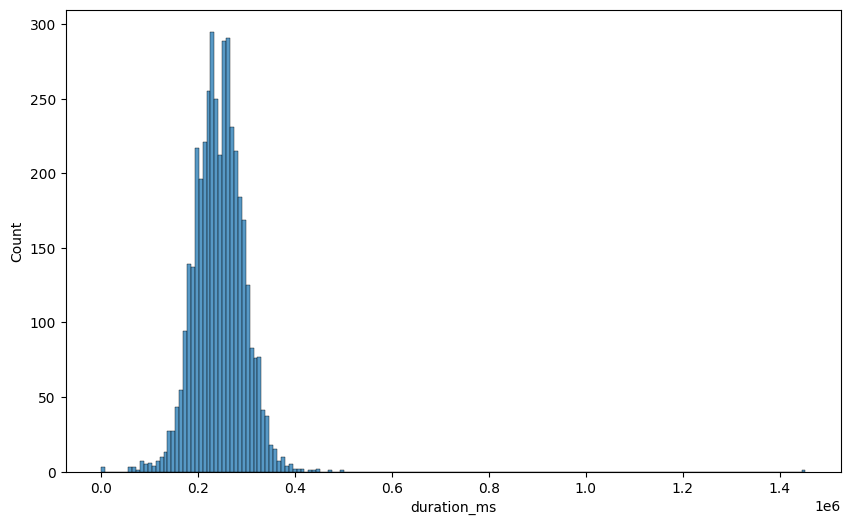

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=tracks['duration_ms'])
plt.show()

### Popularity

In [13]:
tracks['popularity'].describe()

count    4119.000000
mean       23.437728
std        20.937207
min         0.000000
25%         0.000000
50%        25.000000
75%        43.000000
max        69.000000
Name: popularity, dtype: float64

### Album type

### Artist follower

### Artist popularity vs follower

## **Khám phá dữ liệu**

Bảng bên dưới mô tả chi tiết ý nghĩa của các thuộc tính trong bộ dữ liệu `vietnamese_songs.csv`

<center>

| **Tên thuộc tính** | **Ý nghĩa** |
| -----              | -----       |
| **name** | Tên bài hát |
| **release_date** | Ngày bài hát được ra mắt/phát hành |
| **album_type** | Loại album mà bài hát thuộc về (ví dụ: album, single, compilation) |
| **album_name** | Tên của album mà bài hát thuộc về |
| **artists** | Tên của các nghệ sĩ trình diễn bài hát. Nếu có nhiều nghệ sĩ, tên các nghệ sĩ sẽ được phân tách bằng dấu phẩy (",") |
| **duration_ms** | Độ dài của bài hát tính theo đơn vị milli giây |
| **popularity** | Độ phổ biến của bài hát trên nền tảng Spotify, được tính từ 0 đến 100 (100 là phổ biến nhất) |
| **sportify_url** | Liên kết URL dẫn đến bài hát trên nền tảng Spotify |


</center>

## **Làm sạch dữ liệu**

### **Tổng quan về dữ liệu**

In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4117 non-null   object 
 1   release_date  4119 non-null   object 
 2   album_type    4119 non-null   object 
 3   album_name    4116 non-null   object 
 4   artists       4116 non-null   object 
 5   duration_ms   4120 non-null   int64  
 6   popularity    4119 non-null   float64
 7   spotify_url   4120 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 257.6+ KB


**Nhận xét**
- Dữ liệu có 4120 dòng và 8 thuộc tính (cột)
- Có một số cột bị thiếu giá trị bao gồm **`name`**, **`release_date`**, **`album_type`**, **`album_name`**, **`artists`** và **`popularity`**
- **release_data** cần chuyển sang kiểu dữ liệu **`datatime`**

In [ ]:
tracks.describe()

,duration_ms,popularity
count,4.120000e+03,4119.000000
mean,2.442462e+05,23.437728
std,5.293807e+04,20.937207
min,0.000000e+00,0.000000
25%,2.111680e+05,0.000000
50%,2.440000e+05,25.000000
75%,2.760000e+05,43.000000
max,1.453201e+06,69.000000


### **Thay đổi kiểu dữ liệu**

In [ ]:
def fix_release_date(date):
    date = str(date).strip()  
    if date == "0" or date.lower() == "nan":  
        return None
    elif len(date) == 4:  
        return date + "-01-01"  
    return date  

tracks['release_date'] = tracks['release_date'].astype(str).apply(fix_release_date)

tracks['release_date'] = pd.to_datetime(tracks['release_date'], errors='coerce')

### **Xử lý các bài hát bị trùng lặp**

In [ ]:
print(f'Số lượng bài hát bị trùng tên và nghệ sĩ: {tracks.duplicated(subset=["name", "artists"]).sum()}')

Số lượng bài hát bị trùng tên và nghệ sĩ: 1830


In [ ]:
tracks[tracks['name'] == "Nàng Thơ"]

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
4,Nàng Thơ,2018-03-01,single,Nàng Thơ,Hoàng Dũng,254476,0.0,https://open.spotify.com/track/2LykruN1mQlg9nu...
254,Nàng Thơ,2018-03-01,album,25,Hoàng Dũng,254476,0.0,https://open.spotify.com/track/6rVaOdWvFaNyVVX...
1575,Nàng Thơ,2018-03-01,single,Nàng Thơ,Hoàng Dũng,254476,0.0,https://open.spotify.com/track/2LykruN1mQlg9nu...
1855,Nàng Thơ,2020-03-08,single,Nàng Thơ,Hoàng Dũng,254476,40.0,https://open.spotify.com/track/1s7d2cdaZuktw5Y...
3492,Nàng Thơ,2018-03-01,single,Nàng Thơ,Hoàng Dũng,254476,0.0,https://open.spotify.com/track/2LykruN1mQlg9nu...
3676,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.0,https://open.spotify.com/track/1w3eUC89GPspKpi...
3895,Nàng Thơ,2020-03-08,single,Nàng Thơ,Hoàng Dũng,254476,40.0,https://open.spotify.com/track/1s7d2cdaZuktw5Y...
4068,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.0,https://open.spotify.com/track/1w3eUC89GPspKpi...


**Nhận xét**

Ví dụ xét bài hát **Nàng thơ** của nghệ sĩ **Hoàng Dũng**, chúng ta thấy bài hát được phát hành ở 2 thể loại khác nhau là **đĩa đơn (Nàng thơ)** và **album (25)**. Vì thế, chúng ta cần loại bỏ trùng lặp dựa vào `name`, `artists`, `album_type` và `album_name`




In [ ]:
tracks.drop_duplicates(subset=["name", "artists", "album_type"], keep="last", inplace=True)

In [ ]:
tracks[tracks['name'] == "Nàng Thơ"]

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
3895,Nàng Thơ,2020-03-08,single,Nàng Thơ,Hoàng Dũng,254476,40.0,https://open.spotify.com/track/1s7d2cdaZuktw5Y...
4068,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.0,https://open.spotify.com/track/1w3eUC89GPspKpi...


In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2405 entries, 15 to 4119
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          2403 non-null   object        
 1   release_date  2377 non-null   datetime64[ns]
 2   album_type    2404 non-null   object        
 3   album_name    2402 non-null   object        
 4   artists       2402 non-null   object        
 5   duration_ms   2405 non-null   int64         
 6   popularity    2404 non-null   float64       
 7   spotify_url   2405 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 169.1+ KB


### **Xử lý các dữ liệu có các thuộc tính không hợp lệ hoặc bị mất**

**Tên bài hát (name)**

*Cách giải quyết*: Loại bỏ những dữ liệu bị mất tên bài hát

In [ ]:
missing_name= tracks[tracks[['name']].isnull().any(axis=1)]

missing_name

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
3194,NaN,NaT,compilation,NaN,NaN,0,0.0,https://open.spotify.com/track/1WrUlLfIFuiaixm...
3245,NaN,NaT,single,NaN,NaN,0,0.0,https://open.spotify.com/track/0vvxr4eHbexcsfo...


In [ ]:
tracks = tracks.dropna(subset=['name'])

**Độ phổ biến (popularity)**

*Cách giải quyết*: Gán 0 cho những bài hát bị mất dữ liệu của thuộc tính popularity

In [ ]:
missing_popularity = tracks[tracks[['popularity']].isnull().any(axis=1)]

missing_popularity

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
617,Và Rồi Em Block….,NaT,NaN,NaN,NaN,186528,NaN,https://open.spotify.com/episode/7pHlGWTt9ZQoK...


In [ ]:
tracks = tracks.fillna({'popularity': 0})

### **Các câu hỏi**

**Câu 1**: Xu hướng phát hành các bài hát tại thị trường âm nhạc Việt Nam trên nền tảng Spotify trong 25 năm (từ 2000 đến 2024) là như thế nào?

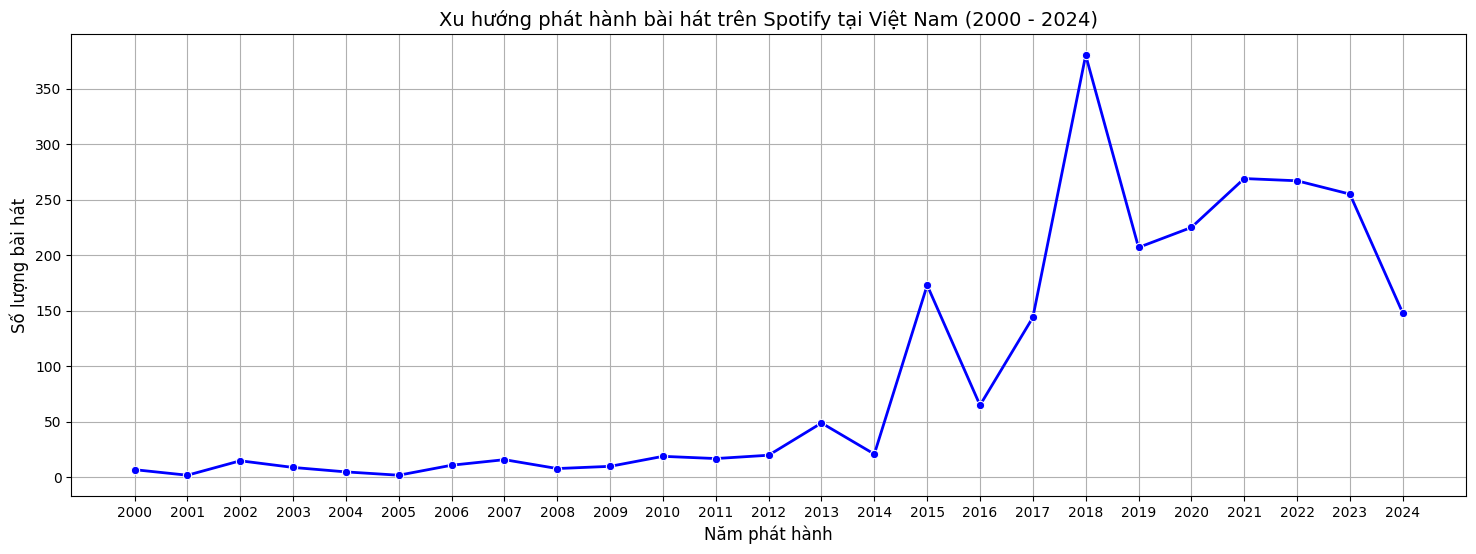

In [ ]:
tracks['release_year'] = tracks['release_date'].dt.year

filtered_tracks = tracks[tracks['release_year'].between(2000, 2024)]

song_counts = filtered_tracks['release_year'].value_counts().sort_index()

plt.figure(figsize=(18, 6))
sns.lineplot(x=song_counts.index, y=song_counts.values, marker='o', color='b', linewidth=2)

plt.xlabel('Năm phát hành', fontsize=12)
plt.ylabel('Số lượng bài hát', fontsize=12)
plt.title('Xu hướng phát hành bài hát trên Spotify tại Việt Nam (2000 - 2024)', fontsize=14)
plt.xticks(range(2000, 2025, 1))  
plt.grid(True)

plt.show()

**Nhận xét về xu hướng phát hành bài hát trên Spotify tại Việt Nam (2000 - 2025)**

**Trong giai đoạn 2000 - 2014**,

- Số lượng bài hát phát hành trên Spotify **còn rất ít**. 
- Bên cạnh đó, trong năm **2013** là năm có số lượng bài hát được phát hành nhiều nhất trong giai đoạn này với gần 50 bài hát.

$\Rightarrow$ Điều này có thể do Spotify chưa phổ biến tại Việt Nam hoặc chưa có dữ liệu đầy đủ về các bài hát phát hành trước đó.


**Trong giai đoạn 2015 - 2018**, 

- Có sự gia tăng đáng kể về số lượng bài hát được phát hành. 
- Năm 2018 là đỉnh cao nhất trong toàn bộ giai đoạn, với số lượng bài hát phát hành tăng vọt.

$\Rightarrow$ Điều này có thể phản ánh sự phát triển mạnh mẽ của thị trường nhạc số và sự gia nhập của nhiều nghệ sĩ Việt vào nền tảng Spotify.


**Trong giai đoạn 2019 - 2024**,

- Sau năm 2018, số lượng bài hát phát hành giảm mạnh vào năm 2019 nhưng nhanh chóng phục hồi và tiếp tục tăng trưởng.
- Giai đoạn 2020 - 2023 có xu hướng ổn định, duy trì mức phát hành cao.

$\Rightarrow$ Đây có thể là thời kỳ mà Spotify đã trở thành một kênh phân phối quan trọng đối với nghệ sĩ Việt Nam.

Ngoài ra, dữ liệu năm 2025 hiện tại rất thấp do dữ liệu chưa đầy đủ hoặc mới chỉ là một phần nhỏ của năm nên ta chưa thể có cái nhìn chính xác về xu hướng phát hành bài hát trên Spotify trong năm 2025.

**Câu 2**: Nghệ sĩ có năng suất hoạt động nghệ thuật tích cực và sôi nổi nhất trên Spotify tại thị trường âm nhạc Việt Nam qua từng năm từ 2019 đến 2024?

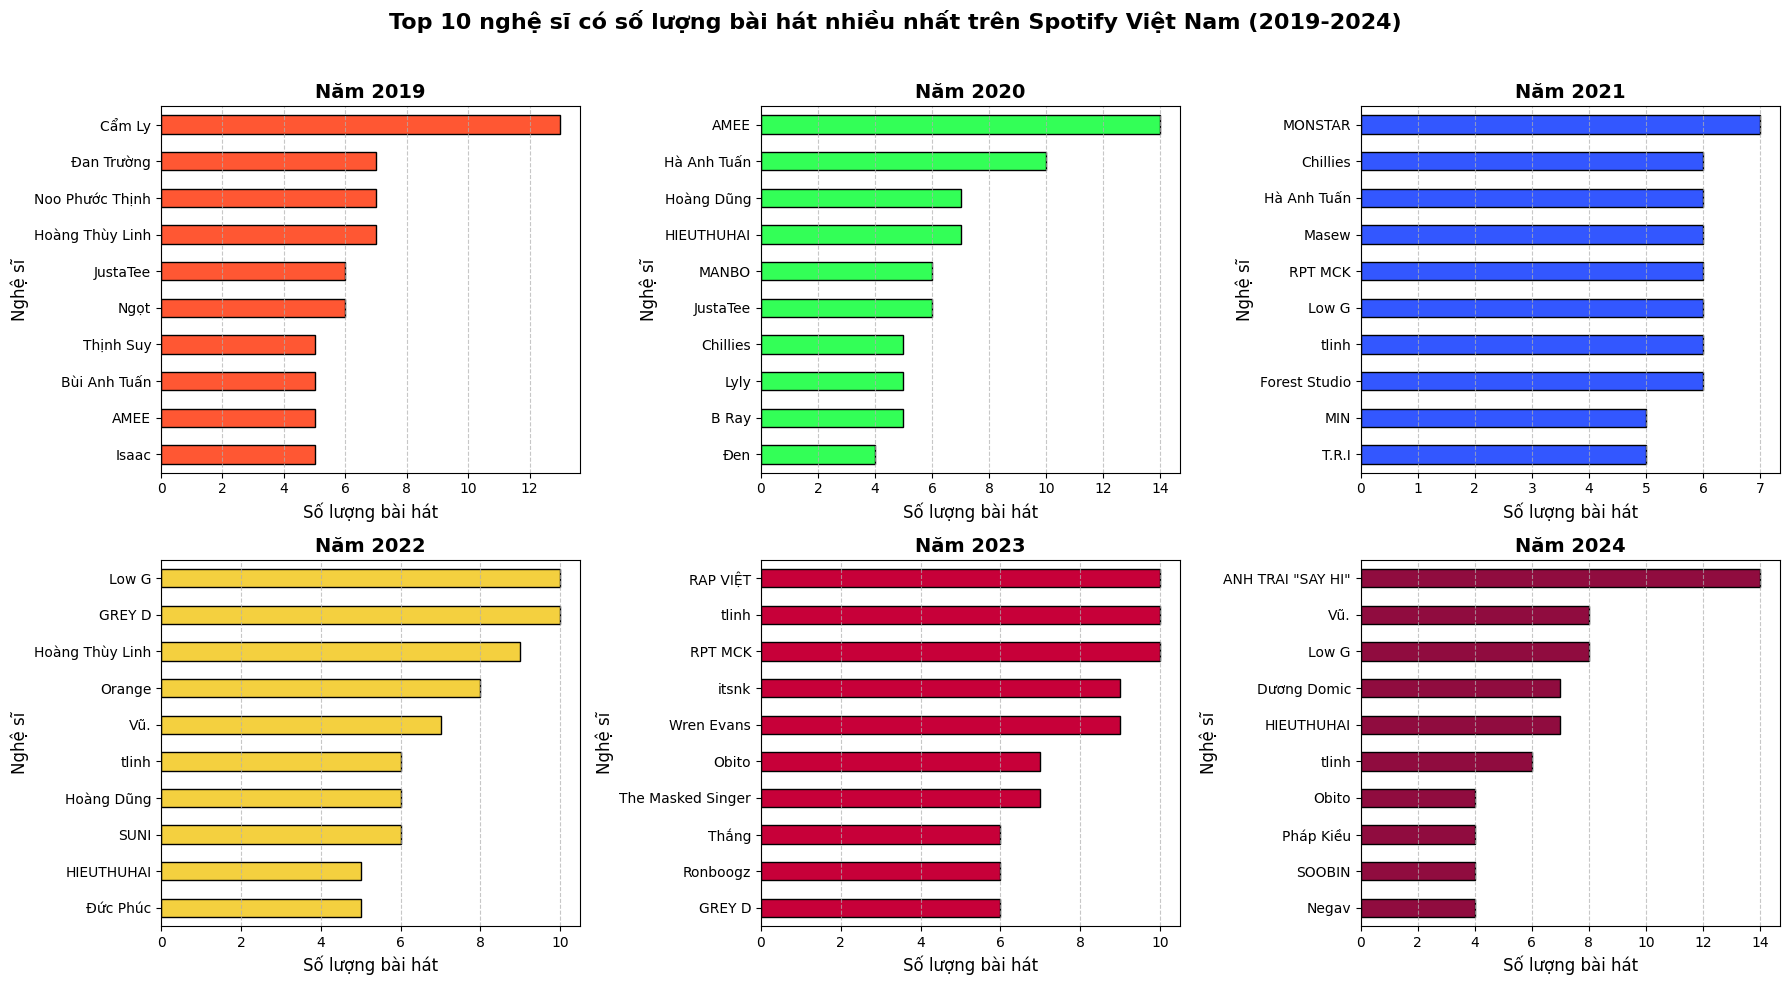

In [ ]:
filtered_tracks = tracks[tracks['release_year'].between(2019, 2024)]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  
fig.suptitle('Top 10 nghệ sĩ có số lượng bài hát nhiều nhất trên Spotify Việt Nam (2019-2024)', fontsize=16, fontweight='bold')

colors = ['#FF5733', '#33FF57', '#3357FF', '#F4D03F', '#C70039', '#900C3F']

for idx, year in enumerate(range(2019, 2025)):
    ax = axes[idx // 3, idx % 3]  

    year_data = filtered_tracks[filtered_tracks['release_year'] == year]
    
    artist_counts = year_data['artists'].str.split(',').explode().str.strip().value_counts()
    
    top_artists = artist_counts.head(10)
    
    top_artists.sort_values().plot(kind='barh', ax=ax, color=colors[idx], edgecolor='black')

    ax.set_title(f'Năm {year}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Số lượng bài hát', fontsize=12)
    ax.set_ylabel('Nghệ sĩ', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

**Nhận xét về top 10 nghệ sĩ có số lượng bài hát nhiều nhất trên Spotify Việt Nam (2019-2024)**

Trong năm **2019** ghi nhận có nhiều nghệ sĩ thuộc dòng nhạc **Pop/Ballad** như **Cẩm Ly**, **Đan Trường**, **Noo Phước Thịnh** và họ cũng dẫn đầu với ***số lượng bài hát cao***. Xu hướng nhạc trẻ đến từ các nghệ sĩ trẻ như **JustaTee**, **Ngọt**, **Thịnh Suy**, **AMEE** đã xuất hiện nhưng ***chưa quá nổi bật*** 

$\Rightarrow$ **Thời kỳ của nhạc Pop/Ballad vẫn còn thống trị, phổ biến tại thị trường âm nhạc Việt Nam**


Trong năm **2020** ghi nhận việc **AMEE** vươn lên top 1, thể hiện sức hút của nhạc **Pop** tươi trẻ. **Hoàng Dũng**, **Hà Anh Tuấn** vẫn giữ phong độ với **Ballad**. **B Ray**, **Đen** xuất hiện, báo hiệu sự nổi lên của **Rap**

$\Rightarrow$ **Rap/Indie bắt đầu xuất hiện nổi bật trên thị trường âm nhạc Việt Nam bên cạnh thể loại Pop/Ballad đã quá quen thuộc ở những năm trước**


Trong năm **2021** ghi nhận có nhiều nghệ sĩ như MONSTAR, Chillies, Maswe đại diện cho dòng nhạc Indie/Pop-Rock. Rap có sự xuất hiện của RPT MCK, Low G, tlinh, phản ánh sự lan tỏa mạnh mẽ của dòng nhạc này.

$\Rightarrow$ **Thị trường âm nhạc Việt Nam dần dần tiếp nhận và bước chuyển sang thể loại Rap/Hip-Hop**

Trong năm **2022** ghi nhận việc **Low G** dẫn đầu, tiếp tục khẳng định sự thống trị của **Hip-Hop**. **Hoàng Thùy Linh**, **Orange**, **Đức Phúc** vẫn duy trì được lượng bài hát đáng kể.

$\Rightarrow$ **Các thể loại nhạc như Pop/Ballad, Rap/Hip-Hop và Indie,... vẫn tiếp tục phát triển trên thị trường âm nhạc Việt Nam**

Trong năm **2023** ghi nhận sự bùng nổ của những chương trình âm nhạc như việc **RAP VIỆT** đứng đầu do hiệu ứng từ chương trình cùng tên **Rap Việt** cùng với đó là sự xuất hiện của hàng loạt rapper xuất hiện như **RPT MCK**, **Wren Evans**, **Obito**, **Thắng**. Bên cạnh đó cũng kể đến chương trình **The Masked Singer** xuất hiện.

$\Rightarrow$ **Rap/Hip-Hop chiếm sóng và cũng là sự bùng nổ của những chương trình âm nhạc như Rap Việt và The Masked Singer**

Trong năm **2024** ghi nhận việc chương trình âm nhạc có quy mô lớn **ANH TRAI "SAY HI"** bất ngờ vươn lên vị trí đầu. Bên cạnh đó là sự xuất hiện của những tân binh như **Dương Domic**, **Pháp Kiều**, **Negav**, ...

$\Rightarrow$ **Thấy được sự xuất hiện mạnh mẽ từ thế hệ nghệ sĩ trẻ**

**Kết luận**
- Các dòng nhạc thay đổi theo thời gian khi mà từ **Pop/Ballad (2019-2020)** đến **Indie/Rap (2021-2022)** và cuối cùng là **Rap/Hip-Hop thống trị (2023-2024)**.
- Một số nghệ sĩ xuất hiện mạnh mẽ trong một năm nhưng sau đó giảm dần. Tuy nhiên vẫn có những nghệ sĩ hoạt động bền bỉ như **Low G**, **HIEUTHUHAI**, **tlinh** khi họ đã liên tục xuất hiện trong biểu đồ trên ở nhiều năm liền.
- Các chương trình âm nhạc tiêu biểu gồm **Rap Việt**, **The Masked Singer**, **ANH TRAI "SAY HI"** có tác động mạnh đến số lượng bài hát ra mắt.
